In [1]:
import meep as mp

In [2]:
cell = mp.Vector3(16,8,0)

In [3]:
geometry = [
    mp.Block(
        mp.Vector3(mp.inf, 1, mp.inf),    
        center=mp.Vector3(),
        material=mp.Medium(epsilon=12)
    )
]

In [5]:
sources = [
    mp.Source(
        mp.ContinuousSource(frequency=.15,),
        component=mp.Ez,
        center=mp.Vector3(-7,0)
    )
]

In [28]:
pml_layers = [mp.PML(1.0)]

In [30]:
resolution = 10

In [62]:
sim = mp.Simulation(
    cell_size=cell,
    boundary_layers=pml_layers,
    geometry=geometry,
    sources=sources,
    resolution=resolution
)

In [63]:
sim.run(until=200)

-----------
Initializing structure...
time for choose_chunkdivision = 0.000393152 s
Working in 2D dimensions.
Computational cell is 16 x 8 x 0 with resolution 10
     block, center = (0,0,0)
          size (1e+20,1,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (12,12,12)
time for set_epsilon = 0.022033 s
-----------
run 0 finished at t = 200.0 (4000 timesteps)


In [64]:
import numpy as np
import matplotlib.pyplot as plt

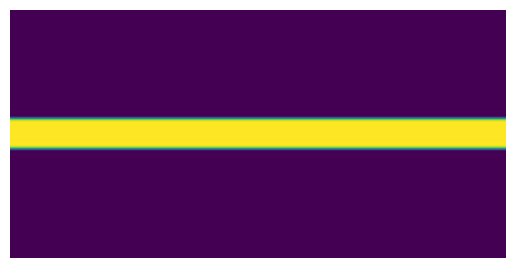

In [65]:
eps_data = sim.get_array(
    center=mp.Vector3(),
    size=cell,
    component=mp.Dielectric
)
plt.figure()
plt.imshow(eps_data.T, interpolation='spline36')
plt.axis('off')
plt.show()

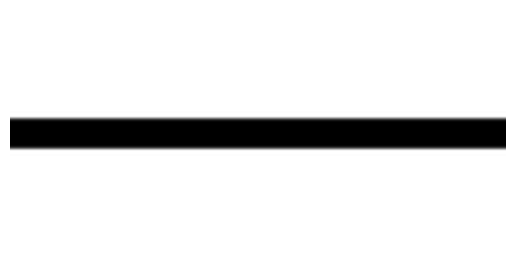

In [66]:
eps_data = sim.get_array(
    center=mp.Vector3(),
    size=cell,
    component=mp.Dielectric
)
plt.figure()
plt.imshow(eps_data.T, interpolation='spline36', cmap='binary')
plt.axis('off')
plt.show()

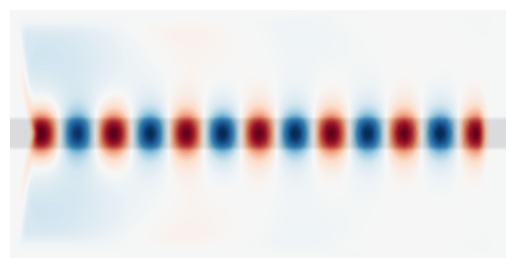

In [67]:
ez_data = sim.get_array(
    center=mp.Vector3(),
    size=cell,
    component=mp.Ez
)
plt.figure()
plt.imshow(eps_data.T, interpolation='spline36', cmap='binary')
plt.imshow(ez_data.T, interpolation='spline36', cmap='RdBu', alpha=.9)
plt.axis('off')
plt.show()